<a href="https://colab.research.google.com/github/dawidkubicki/simple_nn_image_classifier/blob/main/simple_nn_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(train_labels)

60000

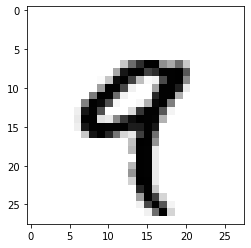

In [4]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", use_bias=True, input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation="softmax"))

In [ ]:
network.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
469/469 [==============================] - 4s 10ms/step - loss: 0.2568 - accuracy: 0.9263
Epoch 2/7
469/469 [==============================] - 5s 10ms/step - loss: 0.1032 - accuracy: 0.9694
Epoch 3/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 4/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0491 - accuracy: 0.9857
Epoch 5/7
469/469 [==============================] - 4s 10ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 6/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0281 - accuracy: 0.9915
Epoch 7/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0214 - accuracy: 0.9937


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9776


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9775999784469604
